# DBSCAN Algorithm Implementation

Importing necessary modules

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import math

Creating a dataset

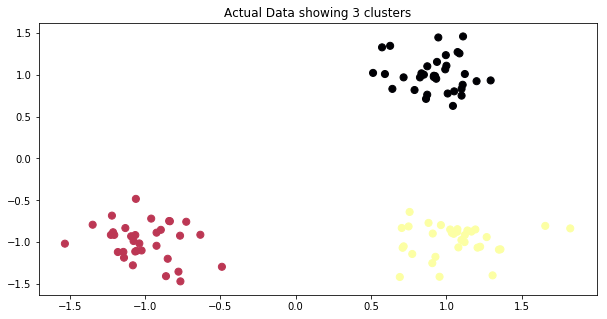

In [76]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=100, centers=centers,random_state=2,cluster_std=0.2)
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("Actual Data showing 3 clusters")
ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap = 'inferno')

Running the algorithm

In [77]:
class DBSCAN(object):
    def __init__(self,X,eps,minpt):
        self.X=X
        self.eps=eps
        self.minpt=minpt
    def dist_eu(self,p,q):
        m=0
        for i in range(len(p)):
            m=m+(p[i]-q[i])**2
        return(m)
    def neigh(self,p):
        d=[]
        for i in range(self.X.shape[0]):
            if self.dist_eu(p,self.X[i])<self.eps:
                d.append(i)
        return(d)
    def get_clusters(self):
        a1=np.zeros(self.X.shape[0])
        c=1
        processed=[]
        for i in range(self.X.shape[0]):
            if i not in processed:
                n=self.neigh(self.X[i])
                processed.extend(n)
                if len(n)>=self.minpt:
                    for j in n:
                        a1[j]=c
                    c+=1
        return(a1)      
        
        

In [78]:
d1=DBSCAN(X,2,10)
d1.get_clusters()

array([1., 2., 1., 2., 3., 1., 1., 2., 1., 3., 3., 3., 1., 3., 3., 3., 2.,
       2., 2., 1., 2., 2., 3., 1., 3., 1., 3., 1., 2., 3., 3., 2., 1., 1.,
       1., 1., 3., 2., 3., 3., 1., 1., 2., 2., 2., 2., 3., 1., 3., 3., 1.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 3., 1., 3., 2.,
       3., 1., 3., 1., 1., 2., 2., 2., 1., 2., 3., 2., 3., 3., 3., 1., 3.,
       1., 1., 3., 2., 1., 3., 2., 1., 3., 3., 1., 3., 1., 1., 3.])

In [79]:
y

array([0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 0, 1, 1,
       2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1,
       1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0,
       2, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2,
       1, 0, 2, 1, 0, 2, 2, 0, 2, 0, 0, 2])

Final Plot

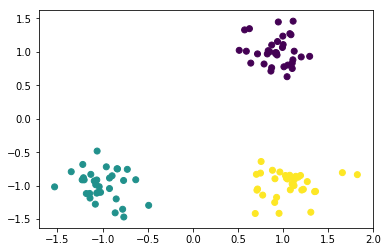

In [80]:
plt.scatter(X[:,0],X[:,1],c=df['cluster'])